# Homework 3 Data Mining
# Amro Shanshal

## Building and testing models in Python to predict the interest rate assigned to a loan

### Start with imports of known tools that may be used (others may be imported in respective cells when used)

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, RidgeCV, SGDClassifier, Perceptron, LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import sklearn.model_selection as cv

import xgboost as xgb
from xgboost import plot_importance


#### Import data

In [2]:
# import training data for modeling and clearning
train = pd.read_csv("Data for Cleaning & Modeling.csv",low_memory=False)

# import test data 
test = pd.read_csv("Holdout for Testing.csv",low_memory=False)

# import metadata
metadata = pd.read_csv("Metadata.csv", engine='python')

#### Visualize data

In [3]:
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [4]:
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [5]:
#visualize meta table
metadata

,Variable,Definition
0,X1,Interest Rate on the loan
1,X2,A unique id for the loan.
2,X3,A unique id assigned for the borrower.
3,X4,Loan amount requested
4,X5,Loan amount funded
5,X6,Investor-funded portion of loan
6,X7,Number of payments (36 or 60)
7,X8,Loan grade
8,X9,Loan subgrade
9,X10,Employer or job title (self-filled)


#### Visualize the data types for test and train data

In [6]:
print(f"{train.dtypes}\n")

X1      object
X2     float64
X3     float64
X4      object
X5      object
X6      object
X7      object
X8      object
X9      object
X10     object
X11     object
X12     object
X13    float64
X14     object
X15     object
X16     object
X17     object
X18     object
X19     object
X20     object
X21    float64
X22    float64
X23     object
X24    float64
X25    float64
X26    float64
X27    float64
X28    float64
X29    float64
X30     object
X31    float64
X32     object
dtype: object



In [7]:
print(f"{test.dtypes}\n")

X1     float64
X2       int64
X3       int64
X4      object
X5      object
X6      object
X7      object
X8      object
X9      object
X10     object
X11     object
X12     object
X13    float64
X14     object
X15     object
X16     object
X17     object
X18     object
X19     object
X20     object
X21    float64
X22      int64
X23     object
X24      int64
X25    float64
X26    float64
X27      int64
X28      int64
X29      int64
X30     object
X31      int64
X32     object
dtype: object



### Data check and cleaning

#### Remove the columns that are not useful in my model of predicting the interest rates

In [3]:
# Drop unnecessary columns

#X2, X3, X10, X11, X12, X16,X17 (I dont care what loan type it is), X18, X20, X23, X25, X26, X32 are not needed for my model

#delete the column without having to reassign df do --> use axis, inplace

train.drop(['X2', 'X3','X10','X11','X12','X16','X17','X18','X20','X23','X25','X26','X32'], axis=1, inplace=True)
test.drop(['X1','X2', 'X3','X10','X11','X12','X16','X17','X18','X20','X23','X25','X26','X32'], axis=1, inplace=True)

In [4]:
# Remove X15 because I do not find it necessary when a loan was issued
test.drop(['X15'], axis=1, inplace=True)
train.drop(['X15'], axis=1, inplace=True)

#### Visualize NaN values in the columns that have NaN values

In [5]:
# creating bool series for NaN values
bool_series_x1 = pd.isnull(train["X1"])

# display NaN values
train[bool_series_x1]

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X19,X21,X22,X24,X27,X28,X29,X30,X31
21,NaN,"$2,300","$2,300",$590,36 months,D,D2,37152.0,VERIFIED - income,088xx,2.26,0.0,0.0,4.0,0.0,2211.0,88.40%,13.0
29,NaN,"$15,500","$15,500","$14,400",36 months,A,A5,125000.0,not verified,068xx,7.05,0.0,1.0,8.0,0.0,16931.0,34.60%,21.0
40,NaN,"$5,000","$5,000",$700,36 months,B,B1,75000.0,not verified,804xx,15.55,0.0,0.0,10.0,0.0,66033.0,23%,29.0
60,NaN,"$2,700","$2,700",$550,36 months,F,F4,52200.0,not verified,021xx,12.57,0.0,1.0,12.0,0.0,3075.0,92.30%,13.0
61,NaN,"$12,250","$12,250","$1,525",36 months,C,C2,60000.0,not verified,330xx,17.12,1.0,2.0,10.0,0.0,17214.0,8.10%,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399948,NaN,"$7,000","$7,000","$7,000",36 months,B,B4,43000.0,not verified,284xx,20.60,1.0,1.0,19.0,0.0,5303.0,30.70%,37.0
399954,NaN,"$20,000","$20,000","$20,000",60 months,C,C1,92000.0,VERIFIED - income source,207xx,10.71,1.0,0.0,10.0,0.0,12442.0,66.90%,23.0
399960,NaN,"$12,000","$12,000","$12,000",60 months,C,C4,60000.0,VERIFIED - income,321xx,17.00,0.0,0.0,13.0,0.0,1435.0,25.60%,29.0
399974,NaN,"$6,400","$6,400","$6,400",36 months,NaN,NaN,84200.0,VERIFIED - income,751xx,24.97,0.0,0.0,31.0,0.0,13157.0,31.90%,42.0


In [6]:
bool_series_x4 = pd.isnull(train["X4"])
train[bool_series_x4]

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X19,X21,X22,X24,X27,X28,X29,X30,X31
364111,7.69%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
bool_series_x8 = pd.isnull(train["X8"])
train[bool_series_x8]

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X19,X21,X22,X24,X27,X28,X29,X30,X31
165,7.75%,"$9,850","$9,850","$4,125",36 months,NaN,NaN,70000.0,not verified,100xx,9.09,0.0,1.0,12.0,0.0,1790.0,4.50%,22.0
182,11.54%,"$18,000","$18,000",$565,36 months,NaN,NaN,27000.0,not verified,330xx,10.80,0.0,0.0,5.0,0.0,8537.0,75.50%,5.0
212,10.28%,"$15,000","$15,000",$350,36 months,NaN,NaN,50000.0,not verified,079xx,11.88,0.0,0.0,15.0,0.0,13867.0,33.70%,24.0
222,10.91%,"$18,500","$18,500",$750,36 months,NaN,NaN,36000.0,not verified,981xx,4.67,0.0,2.0,4.0,0.0,25.0,0.20%,4.0
224,11.86%,"$16,000","$16,000",$619,36 months,NaN,NaN,86400.0,not verified,301xx,15.10,0.0,0.0,11.0,0.0,348.0,4.80%,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399980,20.20%,"$30,000","$30,000","$30,000",60 months,NaN,NaN,66275.0,VERIFIED - income,974xx,9.85,0.0,1.0,6.0,0.0,27326.0,79%,14.0
399983,15.61%,"$6,000","$6,000","$6,000",36 months,NaN,NaN,30000.0,VERIFIED - income source,981xx,30.27,0.0,1.0,9.0,0.0,8372.0,61.10%,9.0
399985,11.67%,"$20,000","$20,000","$20,000",60 months,NaN,NaN,118000.0,VERIFIED - income,463xx,26.00,2.0,0.0,17.0,0.0,12133.0,80.90%,28.0
399986,7.12%,"$15,000","$15,000","$15,000",36 months,NaN,NaN,NaN,not verified,480xx,18.26,0.0,0.0,24.0,0.0,45624.0,43.40%,64.0


In [8]:
bool_series_x9 = pd.isnull(train["X9"])
train[bool_series_x9]

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X19,X21,X22,X24,X27,X28,X29,X30,X31
165,7.75%,"$9,850","$9,850","$4,125",36 months,NaN,NaN,70000.0,not verified,100xx,9.09,0.0,1.0,12.0,0.0,1790.0,4.50%,22.0
182,11.54%,"$18,000","$18,000",$565,36 months,NaN,NaN,27000.0,not verified,330xx,10.80,0.0,0.0,5.0,0.0,8537.0,75.50%,5.0
212,10.28%,"$15,000","$15,000",$350,36 months,NaN,NaN,50000.0,not verified,079xx,11.88,0.0,0.0,15.0,0.0,13867.0,33.70%,24.0
222,10.91%,"$18,500","$18,500",$750,36 months,NaN,NaN,36000.0,not verified,981xx,4.67,0.0,2.0,4.0,0.0,25.0,0.20%,4.0
224,11.86%,"$16,000","$16,000",$619,36 months,NaN,NaN,86400.0,not verified,301xx,15.10,0.0,0.0,11.0,0.0,348.0,4.80%,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399980,20.20%,"$30,000","$30,000","$30,000",60 months,NaN,NaN,66275.0,VERIFIED - income,974xx,9.85,0.0,1.0,6.0,0.0,27326.0,79%,14.0
399983,15.61%,"$6,000","$6,000","$6,000",36 months,NaN,NaN,30000.0,VERIFIED - income source,981xx,30.27,0.0,1.0,9.0,0.0,8372.0,61.10%,9.0
399985,11.67%,"$20,000","$20,000","$20,000",60 months,NaN,NaN,118000.0,VERIFIED - income,463xx,26.00,2.0,0.0,17.0,0.0,12133.0,80.90%,28.0
399986,7.12%,"$15,000","$15,000","$15,000",36 months,NaN,NaN,NaN,not verified,480xx,18.26,0.0,0.0,24.0,0.0,45624.0,43.40%,64.0


##### I see around 61000 rows in X1, X8, X9 have NaN value, that is about 15% of the rows in the data

In [9]:
# drop the rows with missing values
train = train.dropna(subset=['X1'])
train = train.dropna(subset=['X4'])
train = train.dropna(subset=['X8'])
train = train.dropna(subset=['X9'])
train = train.dropna(subset=['X13']) #has nan values
train = train.dropna(subset=['X30'])

In [10]:
# drop the rows with missing values
test = test.dropna(subset=['X4'])
test = test.dropna(subset=['X8'])
test = test.dropna(subset=['X9'])
test = test.dropna(subset=['X13']) #has nan values
test = test.dropna(subset=['X30'])

#### Clean the columns from unwanted characters and change data types to int

In [11]:
train['X4'] = train['X4'].str.replace('$', '')

train['X5'] = train['X5'].str.replace('$', '')

train['X6'] = train['X6'].str.replace('$', '')

train['X21'] = train['X21']/100 # divide by 100 to get percentage in decimals
train['X13'] = train['X13'].astype(int) 
train['X22'] = train['X22'].astype(int) 
train['X24'] = train['X24'].astype(int) 
train['X27'] = train['X27'].astype(int)
train['X28'] = train['X28'].astype(int) 
train['X29'] = train['X29'].astype(int)
train['X30'] = train['X30'].str.replace('%', '')
#train['X1'] = train['X1'].astype(int) 
train['X21'] = train['X21'].astype(int) 
#train['X30'] = train['X30'].astype(int) 

train['X31'] = train['X31'].astype(int) 

#### Do same for test data

In [12]:
test['X4'] = test['X4'].str.replace('$', '')

test['X5'] = test['X5'].str.replace('$', '')

test['X6'] = test['X6'].str.replace('$', '')

test['X21'] = test['X21']/100 # divide by 100 to get percentage in decimals
test['X13'] = test['X13'].astype(int) 
test['X22'] = test['X22'].astype(int) 
test['X24'] = test['X24'].astype(int) 
test['X27'] = test['X27'].astype(int)
test['X28'] = test['X28'].astype(int) 
test['X29'] = test['X29'].astype(int)
test['X30'] = test['X30'].str.replace('%', '')

test['X21'] = test['X21'].astype(int) 
#test['X30'] = test['X30'].astype(int) 

test['X31'] = test['X31'].astype(int) 

#### Change data type to numeric and remove unwanted characters from columns

In [13]:
train['X1'] = pd.to_numeric(train['X1'].str.replace('%', ''))/100 # divide by 100 to get percentage in decimals

train['X4'] = pd.to_numeric(train['X4'].str.replace(',', ''))

train['X5'] = pd.to_numeric(train['X5'].str.replace(',', ''))

train['X6'] = pd.to_numeric(train['X6'].str.replace(',', ''))

train['X7'] = pd.to_numeric(train['X7'].str.replace(' months', ''))

train['X19'] = pd.to_numeric(train['X19'].str.replace('x', ''))

train['X30'] = pd.to_numeric(train['X30'].str.replace(',', ''))/100

#### Do same for test data

In [14]:
test['X4'] = pd.to_numeric(test['X4'].str.replace(',', ''))

test['X5'] = pd.to_numeric(test['X5'].str.replace(',', ''))

test['X6'] = pd.to_numeric(test['X6'].str.replace(',', ''))

test['X7'] = pd.to_numeric(test['X7'].str.replace(' months', ''))

test['X19'] = pd.to_numeric(test['X19'].str.replace('x', ''))

test['X30'] = pd.to_numeric(test['X30'].str.replace(',', ''))/100


### Visualize cleaned train and test data

In [15]:
#visualize the data after its converted and cleaned
train.head()

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X19,X21,X22,X24,X27,X28,X29,X30,X31
0,0.1189,25000,25000,19080,36,B,B4,85000,VERIFIED - income,941,0,0,0,10,0,28854,0.521,42
1,0.1071,7000,7000,673,36,B,B5,65000,not verified,112,0,0,0,7,0,33623,0.767,7
2,0.1699,25000,25000,24725,36,D,D3,70000,VERIFIED - income,100,0,0,0,10,0,19878,0.663,17
3,0.1311,1200,1200,1200,36,C,C2,54000,not verified,777,0,0,0,5,0,2584,0.404,31
4,0.1357,10800,10800,10692,36,C,C3,32000,not verified,67,0,0,1,14,0,3511,0.256,40


In [16]:
#visualize the data after its converted and cleaned
test.head()

,X4,X5,X6,X7,X8,X9,X13,X14,X19,X21,X22,X24,X27,X28,X29,X30,X31
0,6000,6000,6000,36,C,C5,68000,VERIFIED - income,430,0,0,1,18,0,19861,0.645,33
1,24000,24000,24000,36,A,A1,110480,VERIFIED - income,945,0,0,1,12,0,17001,0.262,36
2,35000,35000,35000,36,C,C2,86000,VERIFIED - income,195,0,0,0,16,0,25797,0.499,33
3,10000,10000,10000,60,D,D1,30000,VERIFIED - income source,921,0,0,1,13,1,9586,0.438,21
4,24000,24000,24000,60,B,B1,82500,VERIFIED - income,196,0,0,0,27,0,31842,0.413,43


### Because there are categorical variables in the data, I will create an encoder that creates integer labels

In [17]:
Encod = LabelEncoder()

test['X8'] = Encod.fit_transform(test['X8'].values)
test['X9'] = Encod.fit_transform(test['X9'].values)
test['X14'] = Encod.fit_transform(test['X14'].values)


train['X8'] = Encod.fit_transform(train['X8'].values)
train['X9'] = Encod.fit_transform(train['X9'].values)
train['X14'] = Encod.fit_transform(train['X14'].values)


#### Visualize data after creating an encoder

In [18]:
train.head()

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X19,X21,X22,X24,X27,X28,X29,X30,X31
0,0.1189,25000,25000,19080,36,1,8,85000,0,941,0,0,0,10,0,28854,0.521,42
1,0.1071,7000,7000,673,36,1,9,65000,2,112,0,0,0,7,0,33623,0.767,7
2,0.1699,25000,25000,24725,36,3,17,70000,0,100,0,0,0,10,0,19878,0.663,17
3,0.1311,1200,1200,1200,36,2,11,54000,2,777,0,0,0,5,0,2584,0.404,31
4,0.1357,10800,10800,10692,36,2,12,32000,2,67,0,0,1,14,0,3511,0.256,40


In [19]:
test.head()

,X4,X5,X6,X7,X8,X9,X13,X14,X19,X21,X22,X24,X27,X28,X29,X30,X31
0,6000,6000,6000,36,2,14,68000,0,430,0,0,1,18,0,19861,0.645,33
1,24000,24000,24000,36,0,0,110480,0,945,0,0,1,12,0,17001,0.262,36
2,35000,35000,35000,36,2,11,86000,0,195,0,0,0,16,0,25797,0.499,33
3,10000,10000,10000,60,3,15,30000,1,921,0,0,1,13,1,9586,0.438,21
4,24000,24000,24000,60,1,5,82500,0,196,0,0,0,27,0,31842,0.413,43


### Begin analysis and building/testing models

In [20]:
target_train = train['X1']

#remove interest rate column from training data 

predictors_train = train.drop(['X1'], axis=1)

In [21]:
predictors_train.head()

,X4,X5,X6,X7,X8,X9,X13,X14,X19,X21,X22,X24,X27,X28,X29,X30,X31
0,25000,25000,19080,36,1,8,85000,0,941,0,0,0,10,0,28854,0.521,42
1,7000,7000,673,36,1,9,65000,2,112,0,0,0,7,0,33623,0.767,7
2,25000,25000,24725,36,3,17,70000,0,100,0,0,0,10,0,19878,0.663,17
3,1200,1200,1200,36,2,11,54000,2,777,0,0,0,5,0,2584,0.404,31
4,10800,10800,10692,36,2,12,32000,2,67,0,0,1,14,0,3511,0.256,40


#### split training data into training and test sets

In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    predictors_train,
    target_train,
    train_size=0.8,
    test_size=0.20 ,#20% of data set is test
    random_state=42)

### Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor 

# create a regressor object 
regressor = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)  
  
# fit the regressor with X and Y data 
regressor.fit(x_train,y_train) 

# test the output by changing values, like 3750 
y_pred = regressor.predict(x_test) 
 
score = regressor.score(x_train, y_train)
print("R-squared:", score)    


R-squared: 0.898699594691269


In [24]:
ypred = regressor.predict(x_test)

mse = mean_squared_error(y_test, ypred)

DT_RMSE= mse**(1/2)

print("RMSE: ", mse**(1/2)) 

RMSE:  0.013894446713187495


#### Test over/under fitting

In [25]:
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = regressor.predict(x_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)
# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.01


In [28]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(regressor, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.01


In [29]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
regressor.fit(x_train, y_train)

# Predict the labels of the training set
y_pred_train = regressor.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.01


### Random Forest Regressor

In [30]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# create a regressor object 
regressor = RandomForestRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)  
  
# fit the regressor with X and Y data 
regressor.fit(x_train,y_train) 

# test the output by changing values, like 3750 
y_pred = regressor.predict(x_test) 
 
score = regressor.score(x_train, y_train)
print("R-squared:", score)

R-squared: 0.8605981914312208


In [31]:
ypred = regressor.predict(x_test)


mse = mean_squared_error(y_test, ypred)

RF_RMSE= mse**(1/2)

print("RMSE: ", mse**(1/2)) 

RMSE:  0.016292936234234414


#### Test over/under fitting

In [32]:
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = regressor.predict(x_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.02


In [33]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(regressor, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.02


In [34]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
regressor.fit(x_train, y_train)

# Predict the labels of the training set
y_pred_train = regressor.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.02


### Linear Regression

In [35]:
linearreg = LinearRegression() #applying the linear regression model
linearreg.fit(x_train, y_train) #fitting the model to the training data
y_predict = linearreg.predict(x_test) #making predictions based on the testing unit

score = linearreg.score(x_train, y_train)
print("R-squared:", score)    

R-squared: 0.9571684866098157


In [36]:
mse = mean_squared_error(y_test, y_predict)

LR_RMSE= mse**(1/2)

print("Test RMSE: ", mse**(1/2)) 

Test RMSE:  0.008971627496384384


### Ridge Regression

In [37]:
#ridge on train/test
ridge_mod=Ridge(alpha=0.01, normalize=True).fit(x_train,y_train)
ypred = ridge_mod.predict(x_test)
score = ridge_mod.score(x_test,y_test)
mse = mean_squared_error(y_test,ypred)

RR_RMSE= mse**(1/2)


score = ridge_mod.score(x_train, y_train)
print("R-squared:", score)  

print("RMSE: ", mse**(1/2)) 

R-squared: 0.9553179837824225
RMSE:  0.009182912515215528


### XGBoost Extreme Gradient Boosted Decision Tree

In [38]:
xgb_train = xgb.DMatrix(x_train, label=y_train)
xgb_test = xgb.DMatrix(x_test, label=y_test)

#parameters for xgb model

params = {'max_depth': 6, 'min_child_weight': 1,'eta': 0.3,'subsample': 1,'colsample_bytree': 1,
    'objective':'reg:linear','eval_metric':'rmse'}


model = xgb.train(params,xgb_train, num_boost_round=1000,evals=[(xgb_test, "Test")],early_stopping_rounds=10)

[16:34:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:0.254612
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:0.178344
[2]	Test-rmse:0.12499
[3]	Test-rmse:0.087695
[4]	Test-rmse:0.061666
[5]	Test-rmse:0.043554
[6]	Test-rmse:0.031017
[7]	Test-rmse:0.022443
[8]	Test-rmse:0.016678
[9]	Test-rmse:0.012935
[10]	Test-rmse:0.010617
[11]	Test-rmse:0.009232
[12]	Test-rmse:0.008477
[13]	Test-rmse:0.008045
[14]	Test-rmse:0.007784
[15]	Test-rmse:0.007646
[16]	Test-rmse:0.007552
[17]	Test-rmse:0.007512
[18]	Test-rmse:0.007484
[19]	Test-rmse:0.007471
[20]	Test-rmse:0.00743
[21]	Test-rmse:0.007406
[22]	Test-rmse:0.007379
[23]	Test-rmse:0.007378
[24]	Test-rmse:0.007373
[25]	Test-rmse:0.007339
[26]	Test-rmse:0.007324
[27]	Test-rmse:0.007321
[28]	Test-rmse:0.00732
[29]	Test-rmse:0.007319
[30]	Test-rmse:0.007318
[31]	Test-rmse:0.007309
[32]	Test-rmse:0.007288
[33]	Test-rmse:0.007281
[34]	Test-rmse:0.00728
[

In [39]:
XGB_RMSE= model.best_score
print("Best RMSE on test set: ", model.best_score)

Best RMSE on test set:  0.007049


#### Plot feature importance from the xgboost to see how each feature impacts the model

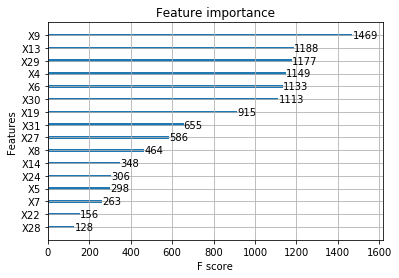

In [40]:
plt.show(plot_importance(model))

I do see that loan subgrade (X9), annual income of borrower (X13), total credit revolving balance (X29), loan amount requested (X4) are the most important features in my model, which in my opinion makes sense . Also, I can drop the features with less importance and remodel, but I dont find it necessary to do that given the goodness of my model and the low RMSE. 

### Compare RMSE for different models

In [41]:
models = {'Model': ['Decision Tree','Random Forest','Linear Regression','Ridge Regression','XGBOOST'],
        'RMSE': [DT_RMSE,RF_RMSE,LR_RMSE,RR_RMSE,XGB_RMSE]}

df = pd.DataFrame(models, columns = ['Model', 'RMSE'])

print (df)

               Model      RMSE
0      Decision Tree  0.013894
1      Random Forest  0.016293
2  Linear Regression  0.008972
3   Ridge Regression  0.009183
4            XGBOOST  0.007049


## Discussion/Comments

Although the RMSE for all my models was relatively low, there are some things that are important to discuss. First, although Linear Regression produced a lower RMSE than Ridge Regerssion, I do not find the linear regression model to be reliable. This is because linear regression assumes a linear relationship between features, over simplifies the problem and has multicolinearity issues.

For comparison, I also modeled using Decision Tree and Random Forest. When it comes to Random Forest, one of the the benefits is its power to handle large data sets with higher dimensionality. With decision tree, the disadvantage is that the reproducibility is highly sensitive as small change in the data can result in large change in the tree structure. In addition, the space and time complexity of decision tree model is relatively high. Random forest shares similar disadvantages as Random Forest. I decided to not use the interest rate predictions from these two models because their RMSE was higher than the RMSE of other models.

I also modeled using Extreme Gradient Boosted Decision Tree model. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. The model creates a collection of relatively weak prediction models using decision trees. At each iteration, a new tree learns the gradients of the residuals between the target values and the current predicted values. Then, the algorithm conducts optimization (based on a convex function and tweaks its parameters iteratively to minimize a given function to its local minimum).

One important advantage of XGBoost is that it provides higher customization options for hyperparameters comparing to other models. As a result, I was able to manually tune the model to get lower RMSE. In addition, XGBoost resolves issues of over fitting. 

Overall, I am aware that my knowledge on which features are important for predicting interest rates is limited. I may have dropped features that were important during data preprocessing, but I believe I produced a good interest rate prediction using my modeling. I chose XGBoost over ridge regression to produce my interest rate predictions because it produced the lowest RMSE and I find it to be the best fine tuned model. One thing to keep in mind is that XGBoost does take more processing time than Ridge Regression until it models for the lowest RMSE.

## Export interest rate predictions from XGBoost model

In [42]:
XGBOOST_test_pred = model.predict(xgb.DMatrix(test))
print(XGBOOST_test_pred)

[0.16505694 0.06072745 0.14280698 ... 0.18359917 0.14190835 0.13216075]


In [43]:
pd.DataFrame(XGBOOST_test_pred).to_csv("Amro_Shanshal_Interest_Rates.csv",index=False)